# Tutorial 18: NumPy, Part III

## PHYS 2600, Spring 2019

In [1]:
# Import cell

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## T18.1 - Up to higher dimensions

Let's begin working with some higher-dimensional arrays!

### Part A

The following 2-dimensional array contains a set of velocity measurements $(v_x, v_y, v_z)$.  


In [2]:
velo = np.array([
    [2.7, 1.1, -0.4],
    [1.9, 1.9, 3.7],
    [-0.4, 0.0, -0.1],
    [1.5, -1.9, -2.7],
    [3.3, 0.4, 1.5],
    [7.1, -0.9, 1.3],
])

__Use two-dimensional indexing, masks, and slices to carry out the following operations:__

* Get the third $v_z$ measurement.

In [3]:
velo[2,2]

-0.1

* Get the last three $v_x$ measurements as an array.

In [4]:
velo[3:,0]

array([1.5, 3.3, 7.1])

* Get an array containing all rows where the speed in the $y$-direction is __negative__.

_(Hint: this requires a row mask!  Look back at the lecture notes to see how this works...)_

In [5]:
# Mask for rows where vy is negative
row_mask = velo[:,1] < 0
print(row_mask)

# Use the mask on the array
velo[row_mask,:]

[False False False  True False  True]


array([[ 1.5, -1.9, -2.7],
       [ 7.1, -0.9,  1.3]])

### Part B

Use `reshape` and `arange` to make a grid of numbers from 1-100, with 10 numbers in each row - `print` it to see that you got it right!

In [7]:
grid = np.arange(1,101).reshape(10,10)
print(grid)

[[  1   2   3   4   5   6   7   8   9  10]
 [ 11  12  13  14  15  16  17  18  19  20]
 [ 21  22  23  24  25  26  27  28  29  30]
 [ 31  32  33  34  35  36  37  38  39  40]
 [ 41  42  43  44  45  46  47  48  49  50]
 [ 51  52  53  54  55  56  57  58  59  60]
 [ 61  62  63  64  65  66  67  68  69  70]
 [ 71  72  73  74  75  76  77  78  79  80]
 [ 81  82  83  84  85  86  87  88  89  90]
 [ 91  92  93  94  95  96  97  98  99 100]]


Now, use a Boolean mask to set all __multiples of 2__ (even numbers) to -2, all __multiples of 3__ to -3, and all __multiples of 5__ to -5.

_(Hint: instead of doing everything at once, maybe start by producing a mask_ `even_mask`, _and just test it out by using it to print all the multiples of 2 in your array.)_

_(Hint: remember that `%` or `np.mod()` are what you want to test for multiples.  Remember that a mask has to be a Boolean array, explicitly; if you create an array of 0/1 instead of False/True, you'll get confusing results!)_



In [8]:
grid[(grid % 2) == 0] = -2
grid[(grid % 3) == 0] = -3
grid[(grid % 5) == 0] = -5
print(grid)
print(grid[grid>0])

[[ 1 -2 -3 -2 -5 -2  7 -2 -3 -2]
 [11 -2 13 -2 -3 -2 17 -2 19 -2]
 [-3 -2 23 -2 -5 -2 -3 -2 29 -2]
 [31 -2 -3 -2 -5 -2 37 -2 -3 -2]
 [41 -2 43 -2 -3 -2 47 -2 49 -2]
 [-3 -2 53 -2 -5 -2 -3 -2 59 -2]
 [61 -2 -3 -2 -5 -2 67 -2 -3 -2]
 [71 -2 73 -2 -3 -2 77 -2 79 -2]
 [-3 -2 83 -2 -5 -2 -3 -2 89 -2]
 [91 -2 -3 -2 -5 -2 97 -2 -3 -2]]
[ 1  7 11 13 17 19 23 29 31 37 41 43 47 49 53 59 61 67 71 73 77 79 83 89
 91 97]


If you now `print` all entries in your array which are _positive_, you'll be left with a list of numbers which are relatively prime to 2, 3, and 5.  The first entry in this list is 7, which is the next prime number; if we repeat our mask procedure to remove multiples of 7, then we'll get the next prime, and so on.  This is the start of a simple and ancient prime-number finding algorithm, the [__Sieve of Eratosthenes__](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes).

In [9]:
## YOUR CODE HERE
print(grid[grid>0])



[ 1  7 11 13 17 19 23 29 31 37 41 43 47 49 53 59 61 67 71 73 77 79 83 89
 91 97]


## T18.2 - Down to lower dimensions

Now let's do some reduction exercises!

### Part A

Use a mask with `np.sum()` or `np.count_nonzero()` to count how many numbers are greater than 100 in the array below.

_(Note: Since_ `count_nonzero` _is more specialized, it tends to be faster than `sum`.  Otherwise, they accomplish  exactly the same task on a mask: finding how many `True` values there are.)_

In [10]:

a = np.array([ 
    [32.64173429, 191.85703207,  28.07613219,  93.6758794 ,
     137.11334151,  98.49036171,  16.21920297,  73.11380953,
     198.45163689,  95.30971938, 105.18180757,  58.69108781,],
    [64.34112696, 120.99784718,  79.40494167, 150.56049688,
     75.27558455, 169.26085959, 119.46765466,   5.15243732,
     63.46223024,  13.83497847,  76.09363069,  15.07392756,],
    [98.81659688, 127.66361968,  25.18028895,   1.80201359,
     41.11615739,  22.39522975,  76.92570925,  45.42721332,
     9.30257269, 103.4348637 , 159.5006543 ,  52.82242142,],
    [115.98655928, 146.78847103, 126.29624116,  35.91681471,
     26.33847396,  38.53213651, 111.75034001, 161.22160872,
     174.9432789 , 158.26168031, 143.29047058, 155.76391194,],
    [31.40801211,  62.97866379,  95.74896593,  22.0901773 ,
     58.7692522 ,  90.20673554, 183.78983523, 198.26328673,
     137.14519089, 194.93600581,  71.14449439,  65.56166131,],
])


In [11]:
gt_100 = np.count_nonzero(a > 100)
print(gt_100)

# Or just use sum:
print(np.sum(a > 100))

24
24


In the last part, we ignored the two-dimensional structure of the array, and just asked about individual numbers.  Now let's try a more structured question: __how many rows in `a` have an average greater than 100?__  Same question in the other axis: __how many columns in `a` have an average greater than 100?__

_(Hint: use `np.mean()` to take the average, and the `axis=` keyword to do it over rows or columns.  The array `a` has 5 rows and 12 columns, so if you're not sure which axis is which, you can look at the size of the array of averages produced by `np.mean()`.)_

In [12]:
row_avg = np.mean(a, axis=1)  # Reduce axis 1 (columns), leaving axis 0 (rows)
print(len(row_avg))  # Should be 5 rows
print(np.sum(row_avg > 100))

col_avg = np.mean(a, axis=0)  # Reduce axis 0 (rows), leaving axis 1 (columns)
print(len(col_avg))  # Should be 12 columns
print(np.sum(col_avg > 100))

5
2
12
5


### Part B

Going back to the `velo` array from problem 1, get an array containing all rows where _all_ components of $v$ are __positive__.

_(Hint: this requires the `np.all` reduction.)_

In [13]:
# Row mask using np.all to test if all entries are positive
pos_mask = np.all(velo > 0, axis=1)
print(pos_mask)

# Apply the mask
velo[pos_mask,:]

[False  True False False  True False]


array([[1.9, 1.9, 3.7],
       [3.3, 0.4, 1.5]])

## T18.3 - Higher-dimensional plots

Now that we know how to manipulate higher-dimensional arrays, there are some new and interesting kinds of plots that we're prepared to make.

One thing we _won't_ look at in this tutorial is three-dimensional plotting.  The simplest kind of 3D plot works very similarly to ordinary 2D plotting, except we just give three arrays for x,y,z.  This doesn't need any of the new array structures we've learned to use.  If you want to learn about 3D plotting in Matplotlib, [here's a nice tour of some of the more useful kinds of plots available](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html).

Instead, we'll try contour and vector field plots, which add a third dimension as a color or a direction.

### Part A - Making grids with NumPy

Both contour and vector field plots are ways to visualize a _two-dimensional_ function, i.e. a function of the form $F(x,y)$.  To see what sort of numerical inputs this requires, let's remind ourselves how the regular `plt.plot` function works.

Suppose we want to plot the single-variable function $f(x) = x^2$ over the interval $x \in [0,2]$.  The procedure we follow is:

* Create a discrete grid of points $\{x_i\}$ over the interval $[0,2]$
* Evaluate the function on our grid, giving another discrete set of points $\{y_i = f(x_i)\}$
* Give these matching sets of points to `plt.plot`, which draws lines between each point $(x_i, y_i)$ and the next.

Here's the code corresponding to that example:


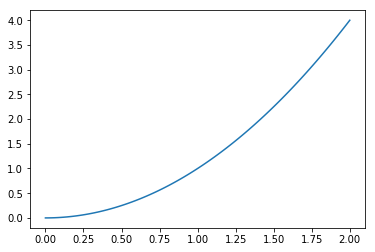

In [14]:
x = np.linspace(0, 2, 100)
y = x**2

plt.plot(x, y)

Now suppose we have the function $F(x,y) = x^2 + y^2$, and we want to plot over the square region $-1 \leq x \leq 1$ and $-1 \leq y \leq 1$.  Let's begin with a contour plot, which will visualize lines along with $F(x,y)$ is constant.  (In this case, $x^2 + y^2 = C$ is the equation for a circle, so our plot should show circles.)

To make a plot and visualize this function, we follow more or less the same procedure as above:

* Create a discrete grid of points $\{x_i, y_i\}$ over the square region we want to plot.
* Evaluate the function on our grid, giving another discrete set of points $\{F_i = F(x_i, y_i)\}$
* Give these matching sets of points to `plt.contour`, which figures out where to draw the lines.

To create a discrete square grid, we just need the _direct product_ (i.e. all possible combinations) of two regular linspaces in $x$ and in $y$.  The `np.meshgrid()` function will accomplish this for us:

In [15]:
xx, yy = np.meshgrid(np.linspace(-1,1,3),np.linspace(3,5,3))
print(xx)
print(yy)

[[-1.  0.  1.]
 [-1.  0.  1.]
 [-1.  0.  1.]]
[[3. 3. 3.]
 [4. 4. 4.]
 [5. 5. 5.]]


Now taking pairs of values at equivalent coordinates in `xx` and `yy` gives a point, e.g. `(xx[0,1], yy[0,1])` gives the point `(0,3)`, and the whole pair of arrays has every possible combination of `x=[-1,0,1]` and `y=[3,4,5]`.

If we have a two-dimensional function, we can apply it over the grid of points $\{x_i, y_i\}$ very simply using the meshgrid outputs, like this:

In [16]:
def F(x,y):
    return 2*x + y**2

F(xx, yy)

array([[ 7.,  9., 11.],
       [14., 16., 18.],
       [23., 25., 27.]])

so now $F(xx,yy)[0,1] = F(0,3) = 9$, and so on.

Your turn to make this work!  Make a __contour plot__ of the function

\\[
F(x,y) = x^2 + y^2
\\]

using the `plt.contour` function to draw the plot.  (Look up the documentation to see how it works, but it needs the outputs of `np.meshgrid` as above.)  Contour plots show lines along with $f(x,y)$ is __constant__, so in this case you should see circles as we discussed above.

_(Note: by default, the plot might look like ellipses instead of circles!  To __adjust the aspect ratio__, try the `plt.figure()` command with the keyword option `figsize=(x,y)`, setting the two dimensions of `figsize` to be equal to make a square plot.)_

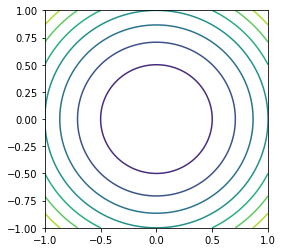

In [17]:
### BEGIN SOLUTION
xx, yy = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))

F = xx**2 + yy**2
plt.figure(figsize=(4,4))
plt.contour(xx,yy,F)
### END SOLUTION

### Part B

Now, let's try to make a __vector field__ plot of the vector
\\[
\mathbf{r} = (x, y)
\\]

over the range $-10 \leq x \leq 10$, $-10 \leq y \leq 10$.

This works similarly to `plt.contour`: you'll need a `meshgrid` of points.  The function you want for a vector field is `plt.quiver`, which takes four arguments: x,y coordinates to plot at, and then the x and y components of each vector.

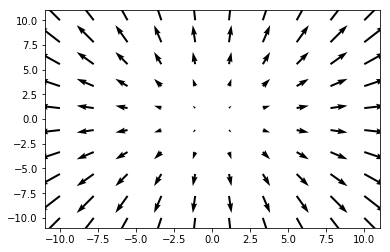

In [18]:
### BEGIN SOLUTION
x, y = np.meshgrid(np.linspace(-10,10,10), np.linspace(-10,10,10))

plt.quiver(x,y,x,y)
### END SOLUTION

### Part C _(optional challenge)_

The two-dimensional magnetic field due to a long wire with constant current $I$ passing through the plane is given by

\\[
\mathbf{B} = \frac{\mu_0 I}{2\pi r} \hat{\phi}
\\]

where in Cartesian coordinates, the angular unit vector is

\\[
\hat{\phi} = (-\sin(\phi),\cos(\phi))
\\]

and the coordinates are

\\[
r = \sqrt{x^2 + y^2} \\
\phi = \tan^{-1}(y/x).
\\]

As we've seen, we need the `np.arctan2(y,x)` function to get the coordinate $\phi$ properly.  

__Plot the vector field B below__, setting $I=1/\mu_0$ for simplicity, over the range $-2 \leq x \leq 2$, $-2 \leq y \leq 2$.

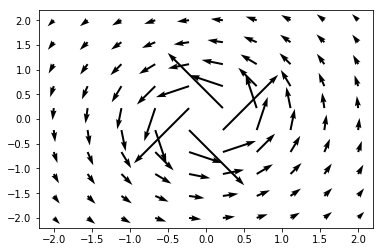

In [19]:
### BEGIN SOLUTION
x, y = np.meshgrid(np.linspace(-2,2,10), np.linspace(-2,2,10))

r = np.sqrt(x**2 + y**2)
phi = np.arctan2(y,x)

B_x = -np.sin(phi) / (2*np.pi*r)
B_y = np.cos(phi) / (2*np.pi*r)

plt.quiver(x, y, B_x, B_y)
### END SOLUTION